In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_dir = './FEC/'
indiv_header_file = my_dir + 'indiv_header_file.csv'
indiv_file = my_dir + 'itcont.txt' # individual donations

ccl_header_file = my_dir + 'ccl_header_file.csv'
ccl_file = my_dir + 'ccl.txt'  # candidate-to-committee linkage

cn_header_file = my_dir + 'cn_header_file.csv'
cn_file = my_dir + 'cn.txt'  # Federal candidates

cm_header_file = my_dir + 'cm_header_file.csv'
cm_file = my_dir + 'cm.txt'  # Committees (funds and PACs)

In [3]:
def get_columns(header_file) -> list:
    with open(header_file, 'r') as hf:
        top_line = hf.readline().strip()
    return top_line.split(',')

In [7]:
# Read the file header:
indiv_cols = get_columns(indiv_header_file)
cn_cols = get_columns(cn_header_file)
cm_cols = get_columns(cm_header_file)
ccl_cols = get_columns(ccl_header_file)

In [8]:
# Read the file data:
indiv = pd.read_csv(indiv_file, sep='|', index_col=0, names=it_cols)
cn = pd.read_csv(cn_file, sep = '|' , index_col=0, names=cn_cols)
cm = pd.read_csv(cm_file,sep = '|' ,index_col=0, names=cm_cols)
ccl = pd.read_csv(ccl_file,sep = '|' ,index_col=0, names=ccl_cols)

/Users/himanshu/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# List top 10 cities by total individual donations. Try creating a visual barchart with matplotlib.

In [11]:
top_cities = indiv.groupby(['CITY','STATE'])['TRANSACTION_AMT'].sum().sort_values(ascending = False).head(10)
top_cities

CITY           STATE
NEW YORK       NY       54352381
WASHINGTON     DC       44665781
SAN FRANCISCO  CA       20413155
HOUSTON        TX       15244116
LOS ANGELES    CA       14299896
CHICAGO        IL       12893934
DALLAS         TX       12854862
ATLANTA        GA       10818510
PHILADELPHIA   PA        7965868
AUSTIN         TX        6181549
Name: TRANSACTION_AMT, dtype: int64

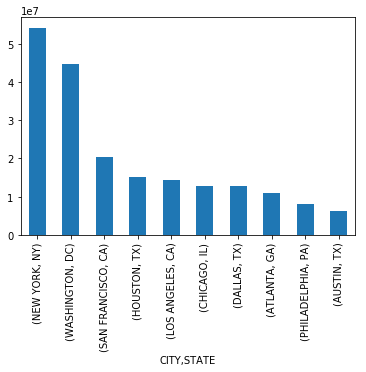

In [66]:
%matplotlib inline
top_cities.plot(kind='bar')
plt.show()

# List the top 20 professions (Occupations) for total donations. 

In [13]:
top_prof = indiv.groupby(['OCCUPATION'])['TRANSACTION_AMT'].sum().sort_values(ascending = False).head(20)
top_prof

OCCUPATION
RETIRED               81686066
NOT EMPLOYED          48126544
ATTORNEY              45375062
PRESIDENT             29959168
CEO                   27913770
HOMEMAKER             22070100
EXECUTIVE             18996299
CHAIRMAN              18615154
PHYSICIAN             16115725
OWNER                 15765437
PARTNER               12305863
CONSULTANT            10303379
FOUNDER               10133003
INVESTOR               9418784
REAL ESTATE            6201996
ENGINEER               6138349
LAWYER                 5878769
CHAIRMAN & CEO         5669716
REAL ESTATE BROKER     4928050
MANAGER                4458240
Name: TRANSACTION_AMT, dtype: int64

# List all individuals who donated a TOTAL of over 100,000 dollars. Show name, city, state, employer, occupation, and total amount. [Tip: You must groupby name+city+state or by name+zipcode]

In [16]:
indiv_owners = indiv.groupby(['NAME','ZIP_CODE'])['TRANSACTION_AMT'].sum()
indiv_owners = indiv_owners[indiv_owners > 1000000]
indiv_owners

NAME                                          ZIP_CODE   
AFSCME SPECIAL ACCOUNT                        200365665      2361087
AMERICAN ACTION NETWORK                       200064604.0    3650000
                                              200064604      2306222
COHEN, STEVEN A.                              068313102      1100000
DEMOCRATIC GOVERNORS ASSOCIATION (DGA)        200053914      3040000
FLINN, GEORGE S DR JR S JR DR                 38117          2545000
FOSTER, PAUL L.                               799011575      1244200
MARCUS, BERNARD MR.                           303272306      2100000
SIMON, DEBORAH                                460328738      1002500
SOLUTIONS FOR WISCONSIN                       78734          1500000
STEYER, THOMAS F.                             941049007      5257565
TARGETED PLATFORM MEDIA LLC                   214034909      1261553
UIHLEIN, RICHARD                              60045          3648100
                                             

# Find people who donated over 5000 directly to a Senate or House candidate who's not even in their own state, and show the details. [Tip: You'll need to compare the candidate's state to the individual donor's state after you get them joined.]

In [37]:
concat_files = pd.concat([cm,indiv], axis=1, join_axes=[indiv.index])
concat_files

,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
CMTE_ID,,,,,,,,,,,,,,,,,,,,,
C00629618,JOHN A PEREZ FOR CONGRESS,STEPHEN J KAUFMAN,777 S FIGUEROA STREET SUITE 4050,NaN,LOS ANGELES,CA,90017,P,H,DEM,...,PRINCIPAL,DOUBLE NICKEL ADVISORS,1032017.0,40,H6CA34245,SA01251735122,1141239,NaN,NaN,2012520171368850783
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,CHAIRMAN OF THE BOARD,1042017.0,5000,NaN,40373239,1147350,NaN,NaN,4020820171370029334
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,"SVP, CORPORATE COMMUNICATIONS",1312017.0,230,NaN,PR1890575345050,1147350,NaN,P/R DEDUCTION ($115.00 BI-WEEKLY),4020820171370029335
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,"SVP, DEPUTY GENERAL COUNSEL, BUSINESS",1312017.0,384,NaN,PR2260663445050,1147350,NaN,P/R DEDUCTION ($192.00 BI-WEEKLY),4020820171370029336
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,"SVP, SALES, CL",1312017.0,384,NaN,PR2283873845050,1147350,NaN,P/R DEDUCTION ($192.00 BI-WEEKLY),4020820171370029337
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,"SVP, SALES & CLIENT MGMT",1312017.0,230,NaN,PR2283874245050,1147350,NaN,P/R DEDUCTION ($115.00 BI-WEEKLY),4020820171370029338
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,"EVP, GLOBAL SERVICES",1312017.0,384,NaN,PR2283905245050,1147350,NaN,P/R DEDUCTION ($192.00 BI-WEEKLY),4020820171370029342
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,"SVP, CORP MKTG & PUBLIC RELAT.",1312017.0,384,NaN,PR2283904845050,1147350,NaN,P/R DEDUCTION ($192.00 BI-WEEKLY),4020820171370029339
C00177436,UNUM GROUP POLITICAL ACTION COMMITTEE (UNUMPAC),"SIMON, ELIZABETH H.",1 FOUNTAIN SQUARE,NaN,CHATTANOOGA,TN,37402,B,Q,NaN,...,UNUM,EVP & CFO,1312017.0,384,NaN,PR2283905045050,1147350,NaN,P/R DEDUCTION ($192.00 BI-WEEKLY),4020820171370029340


In [40]:
donators = concat_files.groupby(['NAME','CMTE_NM','CMTE_ST','STATE'])['TRANSACTION_AMT'].sum()
donators = donators[donators > 5000]

In [59]:
donators.head()

NAME                          CMTE_NM                        CMTE_ST  STATE
 DALE                         PATHWAY TO PROGRESS            CA       CA        8800
 PASCUA                       NRSC                           DC       AZ       33900
 ROBERTO                      SENATE IMPACT: MO & IN         DC       PR       10800
 VAUGHN II                    BLUE SENATE 2018               DC       TX        6800
2008 DAHLGREN FAMILY TRUST 1  REPUBLICAN NATIONAL COMMITTEE  DC       CA       67800
Name: TRANSACTION_AMT, dtype: int64

In [80]:
pd_donators = donators.to_frame(name=None)
pd_donators.head()

,,,,TRANSACTION_AMT
NAME,CMTE_NM,CMTE_ST,STATE,
DALE,PATHWAY TO PROGRESS,CA,CA,8800
PASCUA,NRSC,DC,AZ,33900
ROBERTO,SENATE IMPACT: MO & IN,DC,PR,10800
VAUGHN II,BLUE SENATE 2018,DC,TX,6800
2008 DAHLGREN FAMILY TRUST 1,REPUBLICAN NATIONAL COMMITTEE,DC,CA,67800


In [82]:
file='donators_new.csv'
pd_donators.to_csv(file)

In [84]:
pd_new = pd.read_csv('donators_new.csv')
pd_new.head()

,NAME,CMTE_NM,CMTE_ST,STATE,TRANSACTION_AMT
0,DALE,PATHWAY TO PROGRESS,CA,CA,8800
1,PASCUA,NRSC,DC,AZ,33900
2,ROBERTO,SENATE IMPACT: MO & IN,DC,PR,10800
3,VAUGHN II,BLUE SENATE 2018,DC,TX,6800
4,2008 DAHLGREN FAMILY TRUST 1,REPUBLICAN NATIONAL COMMITTEE,DC,CA,67800


In [101]:
pd_new['uni_name'] = np.where(pd_new['STATE']!=pd_new['CMTE_ST'], pd_new['NAME'], 'NaN')

In [102]:
uni_people = pd_new['uni_name']

In [105]:
uni_people = uni_people.drop_duplicates()

In [106]:
uni_people

0                                    NaN
1                                 PASCUA
2                                ROBERTO
3                              VAUGHN II
4           2008 DAHLGREN FAMILY TRUST 1
5              5000 BROADWAY PRODUCTIONS
6        5000 BROADWAY PRODUCTIONS, INC.
7                         AAOPAC, AAOPAC
11                       AARONSON, PAULA
15                        ABBASI, JAFFER
16                          ABBASI, SARA
17                        ABBASI, SOHAIB
18                         ABBEY, LESLIE
19                         ABBOTT, CHRIS
21                        ABDALLA, SUSAN
23                      ABDOO, RICHARD A
25                  ABDULLAH, YASIN ABIB
30                          ABELE, CHRIS
33                         ABERLY, ANSEL
35                         ABERLY, NAOMI
36                       ABERLY, NAOMI D
39                     ABINADER, GERALYN
40                       ABOUSSIE, JOYCE
43                     ABOUSSIE, JOYCE A
44              

# List of top 10 cities by average donations

In [68]:
avg_top_cities = indiv.groupby(['CITY','STATE'])['TRANSACTION_AMT'].mean().sort_values(ascending = False).head(10)
avg_top_cities

CITY           STATE
LAKE FOREST    IN       1.500000e+06
AFTON          WI       2.477000e+05
WESTPHALIA     MO       1.039500e+05
GOLDEN MEADOW  LA       1.000000e+05
HARVEY         IL       5.011120e+04
PARKER CITY    IN       3.833333e+04
VERONA         NY       3.390000e+04
NSORTH MIAMI   FL       3.390000e+04
WEYBRIDGE      VT       2.506167e+04
SAN JANCINTO   CA       2.500000e+04
Name: TRANSACTION_AMT, dtype: float64